In [14]:
import networkx as nx
import osmnx as ox
from osmnx import convert
from pyrosm.data import sources, get_data
from pyrosm import OSM
import matplotlib.pyplot as plt
from edmonds_karp import find_maximum_flow_using_edmonds_karp
%matplotlib inline

In [15]:
print(sources.cities.available)
# vn = get_data("vietnam")


raw_data_osm = OSM('raw.pbf')

nodes, edges = raw_data_osm.get_network(nodes=True, network_type='driving')


['Aachen', 'Aarhus', 'Adelaide', 'Albuquerque', 'Alexandria', 'Amsterdam', 'Antwerpen', 'Arnhem', 'Auckland', 'Augsburg', 'Austin', 'Baghdad', 'Baku', 'Balaton', 'Bamberg', 'Bangkok', 'Barcelona', 'Basel', 'Beijing', 'Beirut', 'Berkeley', 'Berlin', 'Bern', 'Bielefeld', 'Birmingham', 'Bochum', 'Bogota', 'Bombay', 'Bonn', 'Bordeaux', 'Boulder', 'BrandenburgHavel', 'Braunschweig', 'Bremen', 'Bremerhaven', 'Brisbane', 'Bristol', 'Brno', 'Bruegge', 'Bruessel', 'Budapest', 'BuenosAires', 'Cairo', 'Calgary', 'Cambridge', 'CambridgeMa', 'Canberra', 'CapeTown', 'Chemnitz', 'Chicago', 'ClermontFerrand', 'Colmar', 'Copenhagen', 'Cork', 'Corsica', 'Corvallis', 'Cottbus', 'Cracow', 'CraterLake', 'Curitiba', 'Cusco', 'Dallas', 'Darmstadt', 'Davis', 'DenHaag', 'Denver', 'Dessau', 'Dortmund', 'Dresden', 'Dublin', 'Duesseldorf', 'Duisburg', 'Edinburgh', 'Eindhoven', 'Emden', 'Erfurt', 'Erlangen', 'Eugene', 'Flensburg', 'FortCollins', 'Frankfurt', 'FrankfurtOder', 'Freiburg', 'Gdansk', 'Genf', 'Gent', '

In [16]:
edges

,access,bicycle,bridge,cycleway,foot,highway,junction,lanes,lit,maxspeed,...,width,id,timestamp,version,tags,osm_type,geometry,u,v,length
0,private,None,None,None,None,service,None,None,None,None,...,None,32575784,0,1,"{""visible"":false}",way,"LINESTRING (106.65572 10.81109, 106.65604 10.8...",5811673555,366453642,34.733
1,private,None,None,None,None,service,None,None,None,None,...,None,32575784,0,1,"{""visible"":false}",way,"LINESTRING (106.65604 10.81103, 106.65681 10.8...",366453642,366419656,86.953
2,private,None,None,None,None,service,None,None,None,None,...,None,32575784,0,1,"{""visible"":false}",way,"LINESTRING (106.65681 10.81087, 106.65807 10.8...",366419656,366454788,139.088
3,private,None,None,None,None,service,None,None,None,None,...,None,32575784,0,1,"{""visible"":false}",way,"LINESTRING (106.65807 10.81063, 106.65808 10.8...",366454788,7393930257,1.824
4,private,None,None,None,None,service,None,None,None,None,...,None,32575784,0,1,"{""visible"":false}",way,"LINESTRING (106.65808 10.81063, 106.65810 10.8...",7393930257,7393930258,2.855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32916,None,None,None,None,None,service,None,None,None,None,...,None,1328082948,0,1,"{""visible"":false}",way,"LINESTRING (106.66639 10.79635, 106.66639 10.7...",2822159767,11378916225,1.273
32917,None,None,None,None,None,service,None,None,None,None,...,None,1328102359,0,1,"{""visible"":false}",way,"LINESTRING (106.67208 10.79904, 106.67210 10.7...",6349849607,6349849608,16.836
32918,None,None,None,None,None,service,None,None,None,None,...,None,1328102359,0,1,"{""visible"":false}",way,"LINESTRING (106.67210 10.79889, 106.67212 10.7...",6349849608,6349849609,2.534
32919,None,None,None,None,None,service,None,None,None,None,...,None,1328102359,0,1,"{""visible"":false}",way,"LINESTRING (106.67212 10.79888, 106.67213 10.7...",6349849609,6349849599,5.053


In [17]:
ox.settings.use_cache = True

In [ ]:
# G = ox.graph_from_bbox(bbox=(10.81864,10.78786,106.71535,106.64738), network_type='drive', retain_all=True)
G = raw_data_osm.to_graph(nodes=nodes, edges=edges, graph_type='networkx', retain_all=True, network_type='driving')

G = ox.simplification.simplify_graph(G)
# sugguest me calculate maximum vehicle on each edge

# G = ox.routing.add_edge_speeds(G)
# G = ox.routing.add_edge_travel_times(G)

for u, v, data in G.edges(data=True):
    highway_type = data.get('highway', 'residential')
    if highway_type == 'motorway':
        data['capacity'] = 2000  # Vehicles per hour
    elif highway_type == 'primary':
        data['capacity'] = 1000
    elif highway_type == 'secondary':
        data['capacity'] = 800
    else:
        data['capacity'] = 400  # Default for smaller roads

In [19]:
gdf_nodes, gdf_edges = ox.convert.graph_to_gdfs(G)

gdf_nodes

,y,changeset,timestamp,visible,x,version,tags,osmid,geometry
osmid,,,,,,,,,
5811673555,10.811088,0,0,False,106.655724,1,None,5811673555,POINT (106.65572 10.81109)
7393930262,10.810426,0,0,False,106.658081,1,None,7393930262,POINT (106.65808 10.81043)
366391224,10.808125,0,0,False,106.706390,1,None,366391224,POINT (106.70639 10.80813)
5733448362,10.808466,0,0,False,106.706337,1,None,5733448362,POINT (106.70634 10.80847)
366418696,10.809298,0,0,False,106.706223,1,None,366418696,POINT (106.70622 10.80930)
...,...,...,...,...,...,...,...,...,...
12237410484,10.791305,0,0,False,106.692337,1,None,12237410484,POINT (106.69234 10.79130)
366376129,10.807628,0,0,False,106.716370,1,None,366376129,POINT (106.71637 10.80763)
1276696893,10.815022,0,0,False,106.709412,1,None,1276696893,POINT (106.70941 10.81502)


In [20]:
gdf_edges

access bicycle bridge cycleway  foot  \
u           v          key                                          
5811673555  7393930262 0    private    None   None     None  None   
            5725018855 0       None    None   None     None  None   
            366408464  0       None    None   None     None  None   
7393930262  5811673555 0    private    None   None     None  None   
366391224   5733448365 0       None    None   None     None  None   
...                             ...     ...    ...      ...   ...   
1276696893  1276696914 0       None    None   None     None  None   
12260437742 7281573376 0       None    None   None     None  None   
6252959018  6252959019 0       None    None   None     None  None   
            6354510459 0       None    None   None     None  None   
            6252959005 0       None    None   None     None  None   

                                highway junction lanes   lit maxspeed  ...  \
u           v          key                                             ...   
5811673555  7393930262 0        service     None  None  None     None  ...   
            5725018855 0    residential     None  None  None     None  ...   
            366408464  0       tertiary     None  None  None     None  ...   
7393930262  5811673555 0        service     None  None  None     None  ...   
366391224   5733448365 0       tertiary     None  None  None     None  ...   
...                                 ...      ...   ...   ...      ...  ...   
1276696893  1276696914 0    residential     None  None  None     None  ...   
12260437742 7281573376 0        service     None  None  None     None  ...   
6252959018  6252959019 0        service     None  None  None     None  ...   
            6354510459 0        service     None  None  None     None  ...   
            6252959005 0        service     None  None  None     None  ...   

                            turn width       osmid timestamp version  \
u           v          key                                             
5811673555  7393930262 0    None  None    32575784         0       1   
            5725018855 0    None  None    32586234         0       1   
            366408464  0    None  None    32575971         0       1   
7393930262  5811673555 0    None  None    32575784         0       1   
366391224   5733448365 0    None  None  1061032132         0       1   
...                          ...   ...         ...       ...     ...   
1276696893  1276696914 0    None  None  1324624411         0       1   
12260437742 7281573376 0    None  None  1324930493         0       1   
6252959018  6252959019 0    None  None  1328079758         0       1   
            6354510459 0    None  None  1328079759         0       1   
            6252959005 0    None  None  1328079764         0       1   

                                                                  tags  \
u           v          key                                               
5811673555  7393930262 0                             {"visible":false}   
            5725018855 0                             {"visible":false}   
            366408464  0                             {"visible":false}   
7393930262  5811673555 0                             {"visible":false}   
366391224   5733448365 0    {"visible":false,"name:en":"Bui Dinh Tuy"}   
...                                                                ...   
1276696893  1276696914 0                 {"visible":false,"layer":"4"}   
12260437742 7281573376 0                             {"visible":false}   
6252959018  6252959019 0                             {"visible":false}   
            6354510459 0                             {"visible":false}   
            6252959005 0                             {"visible":false}   

                           osm_type  \
u           v          key            
5811673555  7393930262 0        way   
            5725018855 0        way   
            366408464  0        way   
7393930262  581167355

In [21]:

# multidigraph to digraph
G = convert.to_digraph(G, weight='length')

# Maximum flow

In [22]:
emonds_karp_maximum_flow, emonds_karp_flow_dict = find_maximum_flow_using_edmonds_karp(G, 366367322, 10910534491)

print(f'Emond Karps max value: {emonds_karp_maximum_flow}') 
print(f'Path: {emonds_karp_flow_dict}')


Emond Karps max value: 800
Path: {(5811673555, 7393930262): 0, (5811673555, 5725018855): 0, (5811673555, 366408464): 0, (7393930262, 5811673555): 0, (366391224, 5733448365): 0, (366391224, 5768658411): 0, (366391224, 5733448362): 0, (5733448362, 366418696): 0, (5733448362, 366391224): 0, (5733448362, 5733023073): 0, (366418696, 5733023082): 0, (366418696, 5733023090): 0, (366418696, 5733448362): 0, (366414641, 5733448375): 0, (366414641, 9612049545): 0, (5733448375, 2030638785): 0, (5733448375, 366414641): 0, (5733448375, 5778236317): 0, (2030638785, 2030639268): 0, (2030638785, 5733448375): 0, (2030638785, 2030638600): 0, (2030639268, 2030639086): 0, (2030639268, 2030638785): 0, (2030639268, 2030639618): 0, (2030639086, 5737826545): 0, (2030639086, 2030639186): 0, (2030639086, 2030639268): 0, (5737826545, 2030638786): 0, (5737826545, 5737826544): 0, (5737826545, 2030639086): 0, (2030638786, 366404504): 0, (2030638786, 5737826545): 0, (2030638786, 5733448370): 0, (366404504, 2030638786

In [23]:
max_value, flow_dict = nx.maximum_flow(G, 366367322, 10910534491,  capacity='capacity')

print(f'Expected max value: {max_value}')
for flow in flow_dict:
    print(f'flow: {flow}, val: {flow_dict[flow]}')

Expected max value: 800
flow: 5811673555, val: {7393930262: 0, 5725018855: 0, 366408464: 0}
flow: 7393930262, val: {5811673555: 0}
flow: 366391224, val: {5733448365: 0, 5768658411: 0, 5733448362: 0}
flow: 5733448362, val: {366418696: 0, 366391224: 0, 5733023073: 0}
flow: 366418696, val: {5733023082: 0, 5733023090: 0, 5733448362: 0}
flow: 366414641, val: {5733448375: 0, 9612049545: 0}
flow: 5733448375, val: {2030638785: 0, 366414641: 0, 5778236317: 0}
flow: 2030638785, val: {2030639268: 0, 5733448375: 0, 2030638600: 0}
flow: 2030639268, val: {2030639086: 0, 2030638785: 0, 2030639618: 0}
flow: 2030639086, val: {5737826545: 0, 2030639186: 0, 2030639268: 0}
flow: 5737826545, val: {2030638786: 0, 5737826544: 0, 2030639086: 0}
flow: 2030638786, val: {366404504: 0, 5737826545: 0, 5733448370: 0}
flow: 366404504, val: {2030638786: 0, 2030639450: 0, 366429842: 0}
flow: 696860119, val: {696860121: 0, 1671468738: 0, 2925962353: 0}
flow: 366372095, val: {366377240: 0, 5755622189: 0, 5725018659: 0}


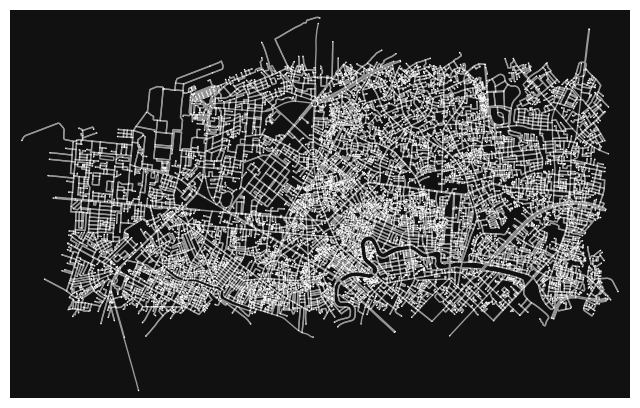

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [24]:
# Get largest strongly connected component
G = ox.truncate.largest_component(G, strongly=False)

ox.plot.plot_graph(nx.MultiDiGraph(G), save=True, show=True, filepath='./graph.png', node_size=1)
# nx.draw(G)
# plt.savefig('graph.png', bbox_inches='tight')

In [25]:
plt.show()